## Данные

В этой лабораторной работе будем работать с [датасетом](https://www.kaggle.com/datasets/arashnic/book-recommendation-dataset), предназначенным для обучения алгоритма рекомендаций книг.

Для рекомендаций нам понадобятся таблицы `Books.csv` и `Ratings.scv`. Файл с рейтингами можно найти в папке с лабораторной работой на гитхабе. Файл с описаниями книг слишком большой, поэтому он располагается только по ссылке:
1. Файл с рейтингами (такой же, как в гитхабе): https://drive.google.com/file/d/1Hliaee7Y584-7lMoGeGjGabRRubzdoYn/view?usp=sharing
2. Файл с книгами:  https://drive.google.com/file/d/1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy/view?usp=sharing

In [1]:
import pandas as pd

In [2]:
!gdown 1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
!gdown 1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy

Downloading...
From: https://drive.google.com/uc?id=1Hliaee7Y584-7lMoGeGjGabRRubzdoYn
To: /content/Ratings.csv
100% 22.6M/22.6M [00:00<00:00, 89.0MB/s]
Downloading...
From: https://drive.google.com/uc?id=1JYpk5GTzK7GWT3mtDb9fNiwaVTzk8BBy
To: /content/Books.csv
100% 73.3M/73.3M [00:01<00:00, 43.2MB/s]


Посмотрим на таблицу `Ratings`.

In [ ]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0


In [ ]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1650719 entries, 0 to 1650718
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   User-ID      1650719 non-null  int64  
 1   ISBN         1650719 non-null  object 
 2   Book-Rating  1650718 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 37.8+ MB


In [ ]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
User-ID,1650719.0,163618.833516,78188.890694,2.0,100906.0,179708.0,229551.0,3051349.0
Book-Rating,1650718.0,2.814037,3.833907,0.0,0.0,0.0,7.0,10.0


Как распределяются рейтинги?

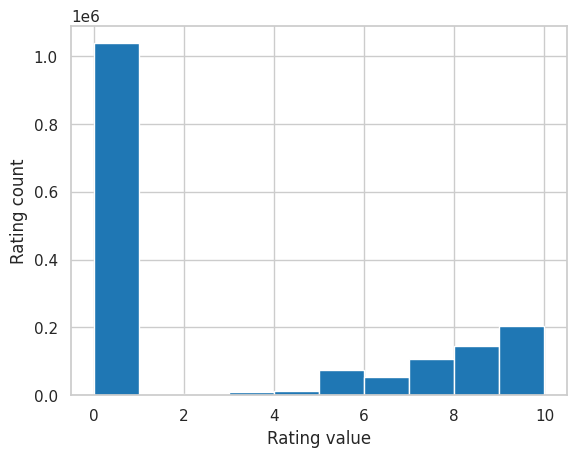

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

ratings["Book-Rating"].hist()
plt.xlabel("Rating value")
plt.ylabel("Rating count")
plt.show()


Теперь посмотрим на таблицу `Books`.

In [ ]:
books = pd.read_csv("Books.csv")
books.head()

<ipython-input-7-7dc4eb500039>:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("Books.csv")


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483749 entries, 0 to 483748
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 483749 non-null  object
 1   Book-Title           483749 non-null  object
 2   Book-Author          483744 non-null  object
 3   Year-Of-Publication  483748 non-null  object
 4   Publisher            483744 non-null  object
 5   Image-URL-S          483748 non-null  object
 6   Image-URL-M          483748 non-null  object
 7   Image-URL-L          483742 non-null  object
dtypes: object(8)
memory usage: 29.5+ MB


- Есть немножко пропусков.
- Проверим уязвимую часть данных – года – на адекватность.

In [ ]:
books["Year-Of-Publication"].value_counts().sort_values(ascending=True)[:10]

,count
Year-Of-Publication,
2037,1
2021,1
2024,1
1928,1
1376,1
1929,1
1904,1
2037,1
2011,1


Есть года, которые еще не наступили...

Проверим, есть ли строковые данные в столбце с годом (потому что `info()` назвал тип данных столбца `object`).

In [ ]:
books[books["Year-Of-Publication"].map(str).str.match("[^0-9]")]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN
271360,on.com/images/P/0380788144.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0380788144.0...,NaN,NaN,NaN,NaN,NaN,NaN
421927,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
433120,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
434067,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


В трех строках пропущен автор, из-за чего смещены данные. Автор либо пропущен, либо склеен с названием. Надо проверить.

В сводке написано, что часть авторов и издателей провущена. Проверим, так ли это.

In [ ]:
books[(books["Book-Author"].isnull()) | (books["Publisher"].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...
271360,on.com/images/P/0380788144.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0380788144.0...,NaN,NaN,NaN,NaN,NaN,NaN
330422,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
341279,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
341426,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...
400078,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


Да, это так. Основные проблемы с данными выявили. Пора их исправлять и приступать к созданию рекомендаций.

## План анализа данных

1. Обработать данные, т.к. в данных есть несколько небольших проблем:
  1. В паре строк в таблице `Books.scv` значения столбцов сдвинуты вправо, а еще есть года, которые еще не наступили.
  2. В нескольких строках в таблице `Books.scv` есть пропуски, а также для рекомендаций в рамках лабораторной не понадобятся ссылки на картинки с обложкой.
  3. Не будем использовать для обучения записи с рейтинг равным 0 из таблицы `Ratings.scv`. Считаем, что 0 означает, что пользователь еще не оценивал книгу, но проявил к ней какой-то интерес.
  4. Не будем использовать для обучения алгоритмов те книги, которым оценка поставлена всего 1 раз. Пользователей, оценивших всего одну книгу тоже брать в расчет не будем (хотя это на самом деле будет не сильно сказываться на обобщающей способности алгоритмов, можете сами проверить).
  5. Пункты 1-4 необходимы и достаточны для выполнения всех задач. Но можно сделать более глубокую обработку.
2. Обучить [SVD](https://surprise.readthedocs.io/en/stable/getting_started.html) на следующих записях: у книги есть хотя бы одна оценка, пользователь оценил хотя бы одну книгу.
   - МАЕ должно быть ниже 1.3 (для этого есть тест)
   - **Сохранить модель.**
3. Научить линейную регрессию ([SGDRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)) предсказывать средний рейтинг книги по следующим столбцам: автор, издатель, год издания, векторизованное название (для векторизации можно использовать [tf-idf](https://scikit-learn.org/stable/modules/feature_extraction.html#tfidf-term-weighting), [word2vec](https://radimrehurek.com/gensim/models/word2vec.html) или более сложный алгоритм. Для достижения требуемой тестом точности достаточно будет tf-idf. Собрав полностью датасет, не забудьте нормализовать данные ([StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)).
   - МАЕ должно быть ниже 1.5 (для этого есть тест)
   - **Сохранить модель.**
4. В файле `personal_recommendation.py` создайте рекомендацию для пользователя, у которого в исходном датасете было больше всего 0 среди рейтингов книг.
   Алгоритм такой:
   1. Находим нужного пользователя.
   2. Делаем предсказание SVD для книг, которым он "поставил" 0.
   3. Берем те книги, для которых предсказали рейтинг не ниже 8. Считаем, что 8 означет, что книга ему точно понравится.
   4. Делаем предсказание LinReg для этих же книг.
   5. Сортируем полученный на шаге 3 список по убыванию рейтинга линейной модели.
   6. В конце файла комментарием записываем полученную рекомендацию.

- То есть идея в том, чтобы сделать для пользователя индивидуальную рекомендацию, показывая в начале списка те книги, которые в целом могли бы иметь высокий рейтинг.
- Обязательно сохраняйте готовую модель и добавляйте ее в свой репозиторий, потому что файл с сохраненной моделью используется в тестах.

## Куда сдавать?

По инструкции в гитхаб – https://shy-question-39d.notion.site/1150ea832e418032bfc3d3e827c380fb?pvs=74

- К этой работе есть два теста – на качество получившихся моделей.
- Пул-реквест нужно сделать в ветку `lab2`.
- Можно загрузить в гитхаб файлы с реализацией по шаблону (шаблон можно дополнять и изменять под себя) или подготовить колаб с решением. Главное – сохранить модели, тесты проверяют их.

> Будьте внимательны! На гитхабе в ветке `main` обновился файл `pyad.yml`.

**Устная защита работ не требуется, но вам могут быть заданы вопросы прямо в вашем пул-реквесте!**

## Задание №1

Обработка данных Books.csv

In [4]:
books = pd.read_csv("Books.csv", dtype={'Year-Of-Publication': str}, low_memory=False)

# Исправление сдвигов вправо
books = books[~books['Year-Of-Publication'].map(str).str.match("[^0-9]")]
books.loc[:, 'Year-Of-Publication'] = pd.to_numeric(books['Year-Of-Publication'], errors='coerce')

# Удаление неактуальных годов
books = books[books['Year-Of-Publication'] <= 2024]

# Удаление ссылок на картинки
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

# Заполнение пропусков или удаление строк с NaN в важных колонках
books.dropna(subset=['Book-Author', 'Publisher'], inplace=True)

Обработка данных Ratings.csv

In [5]:
ratings = pd.read_csv("Ratings.csv")

# Удаление строк с рейтингами, равными 0
ratings = ratings[ratings['Book-Rating'] > 0]

# Удаление книг с единственной оценкой
book_counts = ratings['ISBN'].value_counts()
ratings = ratings[ratings['ISBN'].isin(book_counts[book_counts > 1].index)]

# Удаление пользователей, которые оценили только одну книгу
user_counts = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(user_counts[user_counts > 1].index)]

In [6]:
# Общий объем памяти для таблицы Books
print(f"Total memory usage for Books DataFrame: {books.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Общий объем памяти для таблицы Ratings
print(f"Total memory usage for Ratings DataFrame: {ratings.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Total memory usage for Books DataFrame: 90.71 MB
Total memory usage for Ratings DataFrame: 23.12 MB


## Задание №2

In [7]:
pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357277 sha256=45042cdbb2d1809e24681eb0622db1306232346a4935e331883ee6a097572d9f
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [8]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from joblib import dump

# 1. Подготовка данных для Surprise
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# 2. Создание и обучение модели SVD
model = SVD(n_factors=20)
model.fit(trainset)

# 3. Оценка на тестовой выборке
predictions = model.test(testset)
mae = accuracy.mae(predictions)

print(f"MAE модели: {mae}")

# Проверка MAE < 1.3
if mae <= 1.3:
    print("MAE ниже 1.3! Модель успешно обучена.")
else:
    print("MAE выше 1.3. Требуется настройка гиперпараметров.")

# 4. Сохранение модели
dump(model, "svd_model.joblib")
print("Модель сохранена в файл svd_model.joblib.")

MAE:  1.2451
MAE модели: 1.2450831738791435
MAE ниже 1.3! Модель успешно обучена.
Модель сохранена в файл svd_model.joblib.


## Задание №3

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from joblib import dump

books = pd.read_csv("Books.csv", dtype={'Year-Of-Publication': str}, low_memory=False)
ratings = pd.read_csv("Ratings.csv")

ratings = ratings[ratings['Book-Rating'] > 0]

avg_ratings = ratings.groupby('ISBN')['Book-Rating'].mean().reset_index()
avg_ratings.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)

books_ratings = pd.merge(books, avg_ratings, on='ISBN')

books_ratings.dropna(subset=['Book-Author', 'Publisher', 'Year-Of-Publication', 'Book-Title', 'Average-Rating'], inplace=True)

books_ratings['Year-Of-Publication'] = pd.to_numeric(books_ratings['Year-Of-Publication'], errors='coerce')
books_ratings = books_ratings[books_ratings['Year-Of-Publication'] <= 2024]

# 1. Выделяем признаки и целевую переменную
X = books_ratings[['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']]
y = books_ratings['Average-Rating']

# 2. Предобработка данных. TF-IDF для названия книги
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

one_hot = ColumnTransformer(transformers=[
    ('author', OneHotEncoder(handle_unknown='ignore'), ['Book-Author']),
    ('publisher', OneHotEncoder(handle_unknown='ignore'), ['Publisher'])
], remainder='drop')

# StandardScaler для года издания
scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('title', tfidf, 'Book-Title'),
    ('author_publisher', one_hot, ['Book-Author', 'Publisher']),
    ('year', scaler, ['Year-Of-Publication'])
])

# 3. Создаем pipeline для модели
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(random_state=42, max_iter=1000, tol=1e-3))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE модели: {mae}")

if mae <= 1.5:
    print("MAE ниже 1.5! Модель успешно обучена.")
else:
    print("MAE выше 1.5. Надо изменить гиперпараметры.")

dump(pipeline, "sgd_regressor_model.joblib")
print("Модель сохранена в файл sgd_regressor_model.joblib.")

MAE модели: 1.3300261775115942
MAE ниже 1.5! Модель успешно обучена.
Модель сохранена в файл sgd_regressor_model.joblib.


## Задание №4

In [11]:
import pandas as pd
import numpy as np
from surprise import SVD, Reader, Dataset
from surprise.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_absolute_error
from joblib import load

ratings = pd.read_csv("Ratings.csv")
books = pd.read_csv("Books.csv", dtype={'Year-Of-Publication': str}, low_memory=False)

# 1. Находим пользователя с наибольшим количеством нулевых рейтингов
zero_ratings = ratings[ratings['Book-Rating'] == 0]
user_with_most_zeros = zero_ratings['User-ID'].value_counts().idxmax()

# 2. Подготовка данных для модели SVD
reader = Reader(rating_scale=(1, 10))
data = Dataset.load_from_df(ratings[['User-ID', 'ISBN', 'Book-Rating']], reader)
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

svd_model = load("svd_model.joblib")

# 3. Предсказания для книг, где рейтинг пользователя равен 0
user_zero_ratings = zero_ratings[zero_ratings['User-ID'] == user_with_most_zeros]
book_isbns_with_zero_ratings = user_zero_ratings['ISBN'].tolist()

predictions_svd = []
for isbn in book_isbns_with_zero_ratings:
    pred = svd_model.predict(user_with_most_zeros, isbn)
    predictions_svd.append((isbn, pred.est))

# 4. Отфильтровываем книги с предсказанным рейтингом >= 8
recommended_books_svd = [isbn for isbn, pred in predictions_svd if pred >= 8]

# 5. Подготовка данных для модели линейной регрессии
avg_ratings = ratings.groupby('ISBN')['Book-Rating'].mean().reset_index()
avg_ratings.rename(columns={'Book-Rating': 'Average-Rating'}, inplace=True)
books_ratings = pd.merge(books, avg_ratings, on='ISBN')

# Оставляем только те книги, которые были рекомендованы по SVD
recommended_books_data = books_ratings[books_ratings['ISBN'].isin(recommended_books_svd)]

X = recommended_books_data[['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']]
y = recommended_books_data['Average-Rating']

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split

tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
one_hot = ColumnTransformer(transformers=[
    ('author', OneHotEncoder(handle_unknown='ignore'), ['Book-Author']),
    ('publisher', OneHotEncoder(handle_unknown='ignore'), ['Publisher'])
], remainder='drop')

scaler = StandardScaler()

preprocessor = ColumnTransformer(transformers=[
    ('title', tfidf, 'Book-Title'),
    ('author_publisher', one_hot, ['Book-Author', 'Publisher']),
    ('year', scaler, ['Year-Of-Publication'])
])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', SGDRegressor(random_state=42, max_iter=1000, tol=1e-3))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

# Предсказания для рекомендованных книг
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"MAE линейной регрессии: {mae}")

# Получаем предсказания для книг, которые в списке рекомендаций
predictions_linreg = pipeline.predict(recommended_books_data[['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication']])

recommended_books_data = recommended_books_data.copy()
recommended_books_data['Predicted-Rating'] = predictions_linreg

# Сортируем книги по предсказанному рейтингу линейной регрессии
recommended_books_data_sorted = recommended_books_data.sort_values(by='Predicted-Rating', ascending=False)

# Рекомендации для пользователя
recommended_books_sorted = recommended_books_data_sorted[['Book-Title', 'Book-Author', 'Publisher', 'Year-Of-Publication', 'Predicted-Rating']]

dump(pipeline, "sgd_regressor_model_recommendation.joblib")

print(recommended_books_sorted.head())

MAE линейной регрессии: 3.6465393424099504
                                              Book-Title  \
900                       The Magician's Nephew (Narnia)   
4461                                    Love You Forever   
24282  The Lion, the Witch and the Wardrobe (Full-Col...   
26281  Hop on Pop (I Can Read It All by Myself Beginn...   
24354                         On the Banks of Plum Creek   

                Book-Author                             Publisher  \
900             C. S. Lewis                          HarperTrophy   
4461       Robert N. Munsch                     Firefly Books Ltd   
24282           C. S. Lewis                          HarperTrophy   
26281             Dr. Seuss  Random House Books for Young Readers   
24354  Laura Ingalls Wilder                          HarperTrophy   

      Year-Of-Publication  Predicted-Rating  
900                  1994          5.397957  
4461                 1986          5.342989  
24282                2000          4.761915